<a href="https://colab.research.google.com/github/himanshi420/pythonproject/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# sales  Analysis
import pandas as pd
import matplotlib as plt
import seaborn as sb
import os

%matplotlib inline


#/content/sample_data/Sales/Sales_April_2019.csv
df = pd.read_csv('/content/sample_data/Sales/Sales_April_2019.csv')


files = [ file for file in os.listdir('/content/sample_data/Sales')]
all_month = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/sample_data/Sales/'+file)
  all_month = pd.concat([all_month,df])

all_month.to_csv("all_data.csv", index=False)



In [ ]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
all_data.info

<bound method DataFrame.info of        Order ID                     Product Quantity Ordered Price Each  \
0        278797            Wired Headphones                1      11.99   
1        278798        USB-C Charging Cable                2      11.95   
2        278799    Apple Airpods Headphones                1      150.0   
3        278800            27in FHD Monitor                1     149.99   
4        278801  Bose SoundSport Headphones                1      99.99   
...         ...                         ...              ...        ...   
186845   176554    Lightning Charging Cable                1      14.95   
186846   176555            27in FHD Monitor                1     149.99   
186847   176556      AAA Batteries (4-pack)                3       2.99   
186848   176557                      iPhone                1        700   
186849   176557    Lightning Charging Cable                1      14.95   

            Order Date                           Purchase Address  

In [ ]:
all_data['month'] = 3

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",3
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",3
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",3
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",3
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",3


**DATA CLEANING**

**finding NA  and delete**

In [ ]:
all_data = all_data.dropna(how ='all')
all_data.head().isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


**Find "Or" and delete**

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


In [ ]:
all_data['month'] = all_data['Order Date'].str[0:2]
#all_data['month'] = all_data['month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [ ]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month'],
      dtype='object')

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99


**what was the best month for sale and how much earned that month**

In [ ]:
slo=all_data.groupby(['month'],as_index=False)['Sales'].sum()
slo.head()


,month,Sales
0,01,1822256.73
1,02,2202022.42
2,03,2807100.38
3,04,3390670.24
4,05,3152606.75


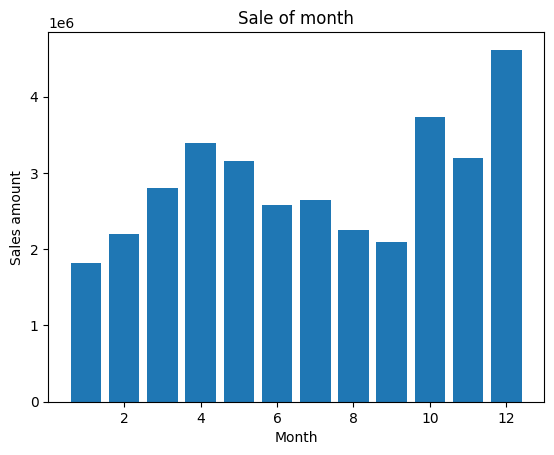

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,slo['Sales'])
plt.ylabel('Sales amount')
plt.xlabel('Month')
plt.title('Sale of month')
plt.show()


**what city  had the heightest number of sales**

In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'Sales'],
      dtype='object')

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99


In [ ]:
lepe= all_data['Purchase Address']
lepe.head()

0         942 Church St, Austin, TX 73301
1         942 Church St, Austin, TX 73301
2         942 Church St, Austin, TX 73301
3    261 10th St, San Francisco, CA 94016
4    764 13th St, San Francisco, CA 94016
Name: Purchase Address, dtype: object

In [ ]:

def get_city(  Address):
  return  Address.split(',')[1]

def states( Address):
  return Address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({states(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco (CA)


<ipython-input-14-71a0dd7b8d89>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tot = all_data.groupby('city').sum()


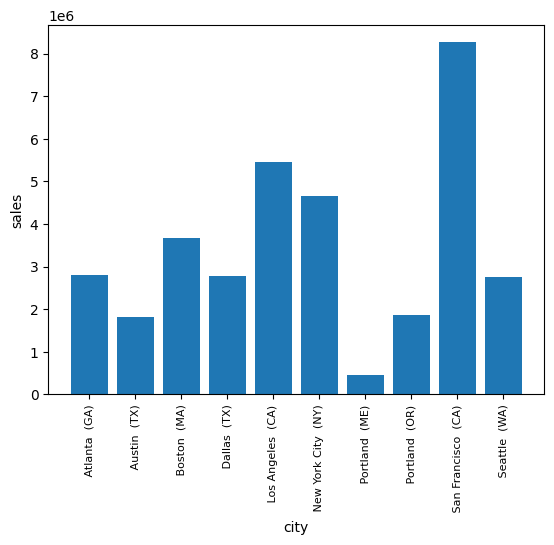

In [ ]:
tot = all_data.groupby('city').sum()
tot.head()

cities = [city for city , df in all_data.groupby('city')]

plt.bar(cities,tot['Sales'])
plt.xticks(cities, rotation='vertical' , size = 8)
plt.xlabel('city')
plt.ylabel('sales')
plt.show()

**what time should we display advertisements to maximize the likehood of customer's buying product**

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco (CA)


In [ ]:


all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [ ]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,700.00,Austin (TX),20
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,14.95,Austin (TX),20
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,23.98,Austin (TX),20
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco (CA),5
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco (CA),0


In [ ]:
timing = all_data.groupby('Hour').sum()

timing.head()

<ipython-input-18-45129d1e3168>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  timing = all_data.groupby('Hour').sum()


,Quantity Ordered,Price Each,Sales
Hour,,,
0,4428,709296.70,713721.27
1,2619,458490.00,460866.88
2,1398,233833.64,234851.44
3,928,144726.42,145757.89
4,937,162058.18,162661.01


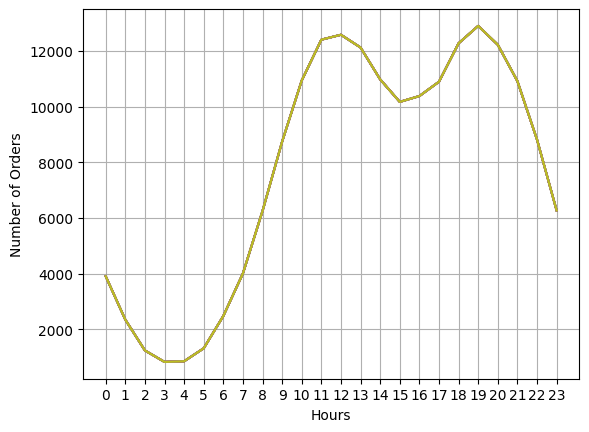

In [ ]:

hours = [hour for hour , df in all_data.groupby('Hour')]


plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


**what product are most  often sold together**

In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'Sales', 'city', 'Hour'],
      dtype='object')

In [ ]:
ploo = all_data[all_data['Order ID'].duplicated(keep =False)]

ploo['grouped'] = ploo.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

ploo = ploo[['Order ID', 'grouped']].drop_duplicates()
ploo.head(100)

<ipython-input-22-dcd673a1d0bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ploo['grouped'] = ploo.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"
...,...,...
2412,164309,"Wired Headphones,AAA Batteries (4-pack)"
2435,164331,"Apple Airpods Headphones,20in Monitor"
2442,164337,"iPhone,Lightning Charging Cable"
2454,164348,"iPhone,Wired Headphones"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for  row in ploo['grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))


for key,value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Which product sold the most ? why do you think it sold the most?**

<ipython-input-30-66177a947810>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quants = prodss.sum()['Quantity Ordered']


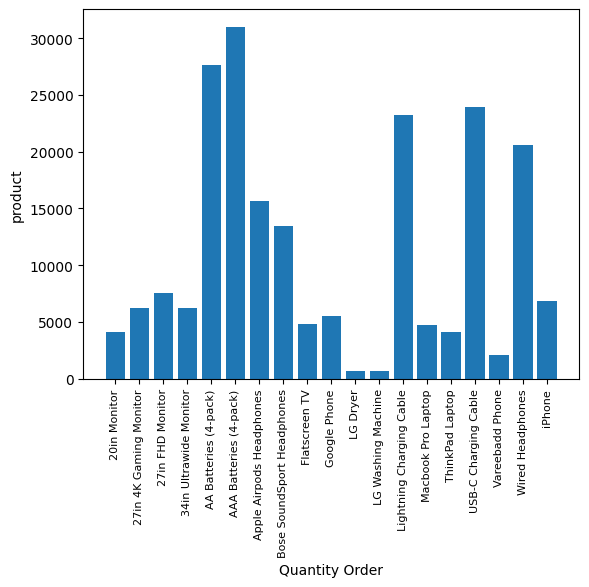

In [ ]:
prodss = all_data.groupby('Product')
quants = prodss.sum()['Quantity Ordered']

products = [product for product , df in prodss]

plt.bar(products, quants)
plt.xlabel('Quantity Order')
plt.ylabel('product')
plt.xticks(products,rotation = 'vertical', size = 8)
plt.show()

<ipython-input-38-a68f7cee61d0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pricess = all_data.groupby('Product').mean()['Price Each']
<ipython-input-38-a68f7cee61d0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical', size = 8)


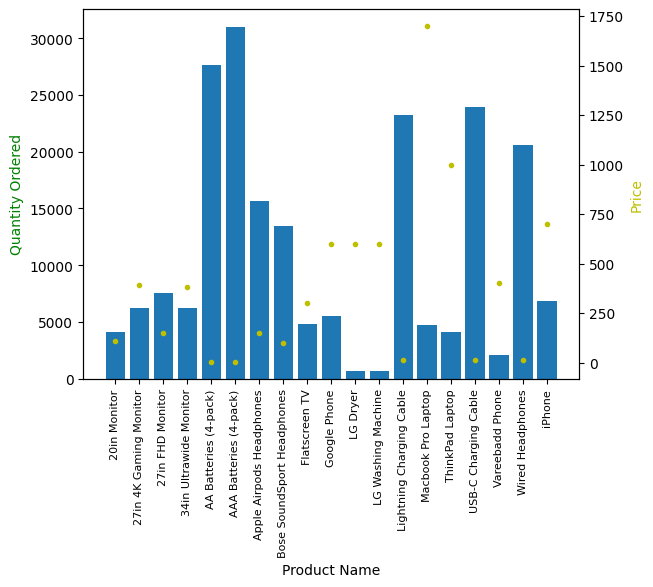

In [ ]:
pricess = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quants)
ax2.plot(products,pricess,'y.')


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price',color='y')
ax1.set_xticklabels(products,rotation = 'vertical', size = 8)
plt.show()